# ARIMA Forecasting Model

This notebook implements an ARIMA model on the `mock_kaggle.csv` dataset to generate demand forecasts.

In [1]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# --- Load processed data (not raw) ---
import pandas as pd

PROCESSED_URL = "https://raw.githubusercontent.com/MiltosTsir/supply-chain-analysis-portfolio/main/portfolio/01-demand-forecasting/data/processed/cleaned_sales.csv"

df = pd.read_csv(PROCESSED_URL, parse_dates=["data"])
df = df.sort_values("data").reset_index(drop=True)

# time series for ARIMA
ts = df.set_index("data")["venda"].asfreq("D").fillna(0)

# simple check
print("Shape:", df.shape)
ts.head()


,venda
data,
2014-01-28,86.0
2014-01-29,222.0
2014-01-30,272.0
2014-01-31,209.0
2014-02-01,369.0


In [2]:
# --- Train/Test split ---
horizon = 60 if len(ts) > 120 else max(1, len(ts) // 5)
train, test = ts.iloc[:-horizon], ts.iloc[-horizon:]
print("Train size:", len(train), " Test size:", len(test))

Train size: 856  Test size: 60


In [3]:
# --- Fit ARIMA model ---
model = ARIMA(train, order=(5,1,0))  # ARIMA(p,d,q)
fit = model.fit()
print(fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  venda   No. Observations:                  856
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4714.608
Date:                Sun, 07 Sep 2025   AIC                           9441.215
Time:                        20:37:27   BIC                           9469.722
Sample:                    01-28-2014   HQIC                          9452.132
                         - 06-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3249      0.022    -14.553      0.000      -0.369      -0.281
ar.L2         -0.3241      0.027    -12.163      0.000      -0.376      -0.272
ar.L3         -0.2372      0.032     -7.443      0.0

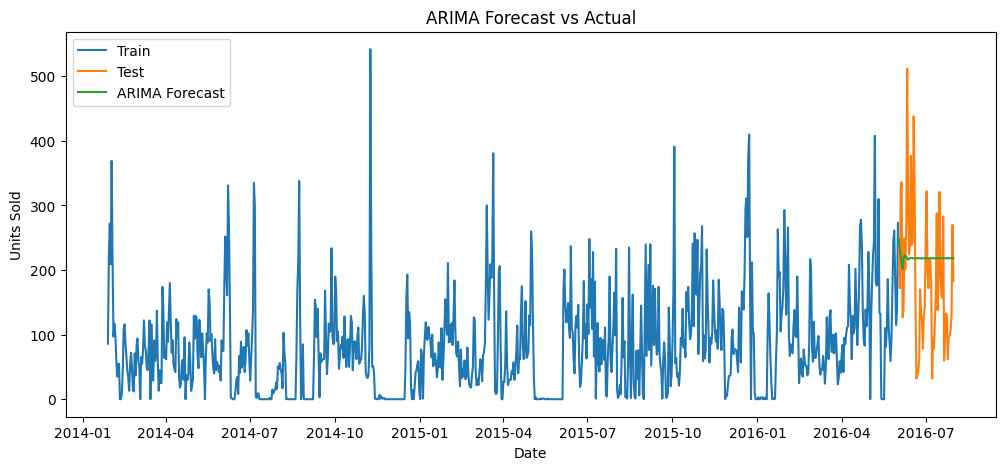

MAE: 87.88
RMSE: 105.94


In [4]:
# --- Forecast ---
forecast = fit.forecast(steps=horizon)

plt.figure(figsize=(12,5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test")
plt.plot(test.index, forecast, label="ARIMA Forecast")
plt.title("ARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend()
plt.show()

# --- Evaluation ---
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")